Корректно отображается тетрадка [тут](https://nbviewer.jupyter.org/github/paantya/gaialib/blob/master/d2018.ipynb).

# Задание #

# %load http://school.podvorye.ru/astro/Ptashin/HIP-TGAS.txt
Сравнение тригонометрических параллаксов звезд TGAS и Hipparcos

1. Дополнение TGAS данными из Hipparocs (параллаксами)

   Каталог получится из 100 000 звезд.

2. Таблицу "рекордсменов" по разностям параллаксом. Первые 50 звезд с самыми большими отличиями.
   Табличку.
   
3. ... на потом
   Построение полных разностей параллаксов по небесной сфере и (возможно) анализ их с помощью сферических функций.
   
   
13-01-2018

Пишем текст дип. работы

1. Описание TGAS (1-2 стр.)
2. Объединение данных XHIP и TGAS, какие данные берем (столбцы)
3. Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше
4. Распределение разностей по неб. сфере (без модуля)
5. Распределение разностей по неб. сфере (модуля) - необязательно
6. Таблица рекордсменов и распределение их по неб. сфере.


- текст по пп. 1-6 прислать

7. Определить МНК первые 36 (от j=0 до j=35) коэффицентов разложения самих разностей по сферическим функциям.

Питон - МНК (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)

# 2018.01.13

### 1. Описание TGAS (1-2 стр.)

**THE TYCHO-GAIA ASTROMETRIC SOLUTION** (**TGAS**) -- работа по дополнению Gaia результатами мисси Tycho-2. для получения параллактов для звед из каталога tycho-2. В дополнеие имеются данные из каталога hip2.  


Позволяет получить субмиллиметровые точности.



### 2.Объединение данных XHIP и TGAS, какие данные берем (столбцы)
ПРи объединении данных двух каталогов, мы брали параллаксы и ошибки параллаксов.
#### **Из Tgas**:
* $parallax$ -- параллах
* $parallax_{error}$ -- ошибка определения параллакса
* $l$ -- долгота в галлактической СК
* $b$ -- широта в галлактической СК
* $hip$ -- `id` звезды в каталоге hipparcos? ждя сведения с каталогом hip2

#### **Из hip2**:
* $parallax$ -- параллакс
* $parallax_{error}$ -- ошибка определения параллакса


### 3.Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше


### 4.Распределение разностей по неб. сфере (без модуля)


### 5.Распределение разностей по неб. сфере (модуля) - необязательно


### 6.Таблица рекордсменов и распределение их по неб. сфере.

### Подключаем библиотеки и модули.

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
Matplotlib version 2.1.2


### Фнкция для отслеживания времени

In [2]:
def times():
    time_format = "%H:%M:%S.%f:" #"%Y.%m.%d-%H:%M:%S.%f:"
    return str(datetime.strftime(datetime.now(), time_format))

### Загружаем Tgas в память

In [8]:
%%time

#!ls ./../../data/astro/tgas/ #Проверка директории на наличие фийлов каталога
!ls ./../../data/

local_tgas = './../../data/astro/tgas/'
file_tgas = 'TgasSource_000-000-000.csv'
print('{}: Loading file {}..'.format(times(), file_tgas),)
df_tgas = pd.read_csv(local_tgas + file_tgas)
len_file = len(df_tgas)
#print(' len_file = {}'.format(len_file))


for i in np.arange(1,16):
#for i in np.arange(1,2):
    n = '0'*(3 - len(str(i)))+str(i)
    file_tgas = 'TgasSource_000-000-'+n+'.csv'
    print('{}: Loading file {}..'.format(times(), file_tgas),)
    df0_tgas = pd.read_csv(local_tgas + file_tgas)
    len_df0 = len(df0_tgas)
    df_tgas = df_tgas.append(df0_tgas)
    len_df = len(df_tgas)
    df0_tgas._clear_item_cache()
    #print(' len_file = {}, len_df = {}'.format(len_df0, len_df))
print('{}: [/] End'.format(times()))

astro  EA_all.txt  EA_all.txt~	SoCS_prev.txt  SoCS_pr.txt
22:07:33.128419:: Loading file TgasSource_000-000-000.csv..
22:07:36.379584:: Loading file TgasSource_000-000-001.csv..
22:07:39.633844:: Loading file TgasSource_000-000-002.csv..
22:07:43.100808:: Loading file TgasSource_000-000-003.csv..
22:07:46.789249:: Loading file TgasSource_000-000-004.csv..
22:07:50.403811:: Loading file TgasSource_000-000-005.csv..
22:07:53.976968:: Loading file TgasSource_000-000-006.csv..
22:07:57.845377:: Loading file TgasSource_000-000-007.csv..
22:08:01.898963:: Loading file TgasSource_000-000-008.csv..
22:08:05.998102:: Loading file TgasSource_000-000-009.csv..
22:08:10.115127:: Loading file TgasSource_000-000-010.csv..
22:08:14.213087:: Loading file TgasSource_000-000-011.csv..
22:08:18.611410:: Loading file TgasSource_000-000-012.csv..
22:08:23.026767:: Loading file TgasSource_000-000-013.csv..
22:08:27.695463:: Loading file TgasSource_000-000-014.csv..
22:08:33.070417:: Loading file TgasSource_

### Загрузим hip2 в память

In [9]:
%%time

#!ls ./../../data/astro/hip/ #Проверка содержания директории с файлом каталога

local_hip = './../../data/astro/hip/'
file_hip = 'hip2.dat'
name_col = ['hip', #Hipparcos identifier
            'isol_n', #Sol. type new reduction
            'isol_o', #Sol. type old reduction
            'ncomp', #Number of components
            'α', #Right Ascension in ICRS
            'δ', #Declination in ICRS
            'parallax_hip', #Parallax
            'μ_α', #Proper motion in Right Ascension
            'μ_δ', #Proper motion in Declination
            'σ_α', #Formal error on α
            'σ_δ', #Formal error on δ
            'parallax_error_hip', #Formal error on parallax
            'σ_μ_α', #Formal error on μ α
            'σ_μ_δ', #Formal error on μ δ
            'nobs', #Number of field transits used
            'gof', #Goodness of fit
            'prej', #Percentage rejected data
            'var', #Cosmic dispersion added
            'ic', #Entry in one of the suppl.catalogues
            'Hp', #Hp magnitude
            'e_Hp', #Error on mean Hp
            'σ_Hp', #Scatter of Hp
            'VarAnn', #Reference to variability annex
            'V_B', #Colour index
            'σ_V_B', #Formal error on colour index
            'V_I', #Colour index
            'U_1', #Upper-triangular weight matrix
            'U_2', #Upper-triangular weight matrix
            'U_3', #Upper-triangular weight matrix
            'U_4', #Upper-triangular weight matrix
            'U_5', #Upper-triangular weight matrix
            'U_6', #Upper-triangular weight matrix
            'U_7', #Upper-triangular weight matrix
            'U_8', #Upper-triangular weight matrix
            'U_9', #Upper-triangular weight matrix
            'U_10', #Upper-triangular weight matrix
            'U_11', #Upper-triangular weight matrix
            'U_12', #Upper-triangular weight matrix
            'U_13', #Upper-triangular weight matrix
            'U_14', #Upper-triangular weight matrix
            'U_15'  #Upper-triangular weight matrix
           ]
print('{}: [/] Loading file {}..'.format(times(), file_hip), end='')
df_hip = pd.read_csv(local_hip + file_hip,
                     sep="\s+", 
                     #skiprows=1,
                     #usecols=[0,7],
                     names=name_col
                    )
len_file = len(df_hip)
print(' len_file = {}'.format(len_file))

22:08:35.680915:: [/] Loading file hip2.dat.. len_file = 117955
CPU times: user 1.04 s, sys: 20 ms, total: 1.06 s
Wall time: 1.44 s


### Выделим из tgas звезды, которые есть в hip2 (параметр `hip != Nan`)

In [10]:
pd.options.mode.chained_assignment = None #отключаем уведомления о предупрежениях

df_tgas_hip = df_tgas[~df_tgas['hip'].apply(lambda x: np.isnan(x))]; #[['hip','parallax','parallax_error']]
df_tgas_hip['hip'] = df_tgas_hip['hip'].apply(lambda x: int(x));
df_tgas_hip.sort_values(by='hip',inplace=True);

### Выделим **нужные** поля из hip2

In [11]:
hip_split = ['hip','parallax_hip','parallax_error_hip']
df_hip_tgas = df_hip[df_hip["hip"].isin(df_tgas_hip['hip'])][hip_split];

Изменяем индексацию, что бы скрестить два подкаталога вместе. (В дальнейшем `df_tgas_hip` нельзя будет скрещивать с `df_tgas` стандартными функциями `pandas`. Оно нам особо и не нужно будет.)

In [12]:
df_tgas_hip.index = df_hip_tgas.index;

df_tgas_hip['parallax_hip'] = df_hip_tgas['parallax_hip'];
df_tgas_hip['parallax_error_hip'] = df_hip_tgas['parallax_error_hip'];
#df_tgas_hip['parallax_relatively_difference'] = np.abs(df_tgas_hip['parallax'] - df_tgas_hip['parallax_hip'])

#df_tgas_hip.head(10)

df_tgas_hip.loc[df_tgas_hip['ra'] > 180,'ra'] = df_tgas_hip[df_tgas_hip['ra'] > 180]['ra'] - 360
df_tgas_hip.loc[df_tgas_hip['l'] > 180,'l'] = df_tgas_hip[df_tgas_hip['l'] > 180]['l'] - 360
df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180,'ecl_lon'] = df_tgas_hip[df_tgas_hip['ecl_lon'] > 180]['ecl_lon'] - 360

#### Замечание

Мы получили 93635 звезд включённых в tgas, вместо 117954 ожидаемых.

## 2 Посчитаем разности параллаксов ##

Разности будем считать только для положительных значений параллаксов.

In [13]:
srez = (df_tgas_hip['parallax'] > 0) & (df_tgas_hip['parallax_hip'] > 0 & ~df_tgas_hip['parallax'].apply(lambda x: np.isnan(x)) & ~df_tgas_hip['parallax_hip'].apply(lambda x: np.isnan(x)))

df_tgas_hip['parallax_difference'] = df_tgas_hip[srez]['parallax_hip'] - df_tgas_hip[srez]['parallax'];
df_tgas_hip['parallax_difference_abs'] = df_tgas_hip[srez]['parallax_difference'].apply(lambda x: np.abs(x));

Гистаграмма разностей параклаксов

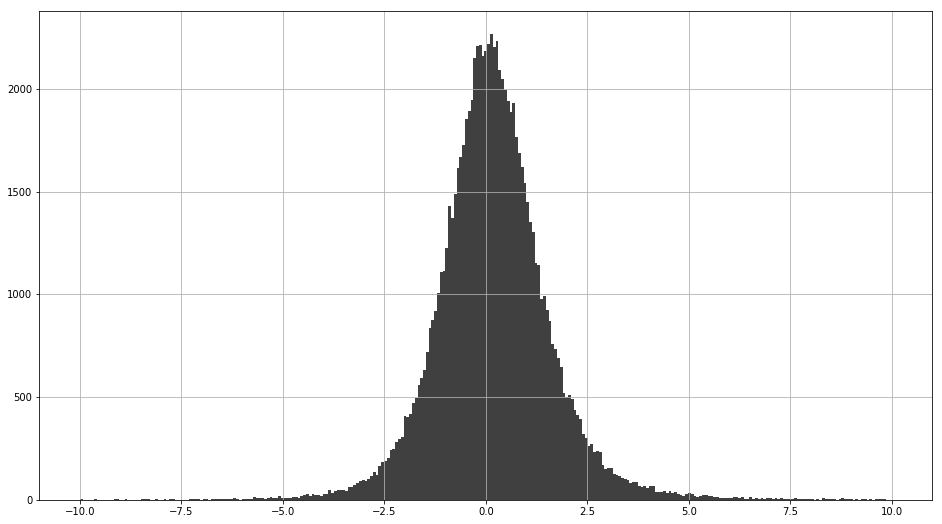

In [14]:
df_tgas_hip['parallax_difference'].hist(bins='fd',range=(-10,10), color='k', alpha=0.75,  figsize = (16,9)); #fd

Выделим таблицу "*рекордсменов*" в порядке убывания по разности параллаксов.

22:08:45.318303:: Begin plot_hex_hammer paralax ra, dec, 70.
22:08:45.767860:: End plot_hammer paralax.


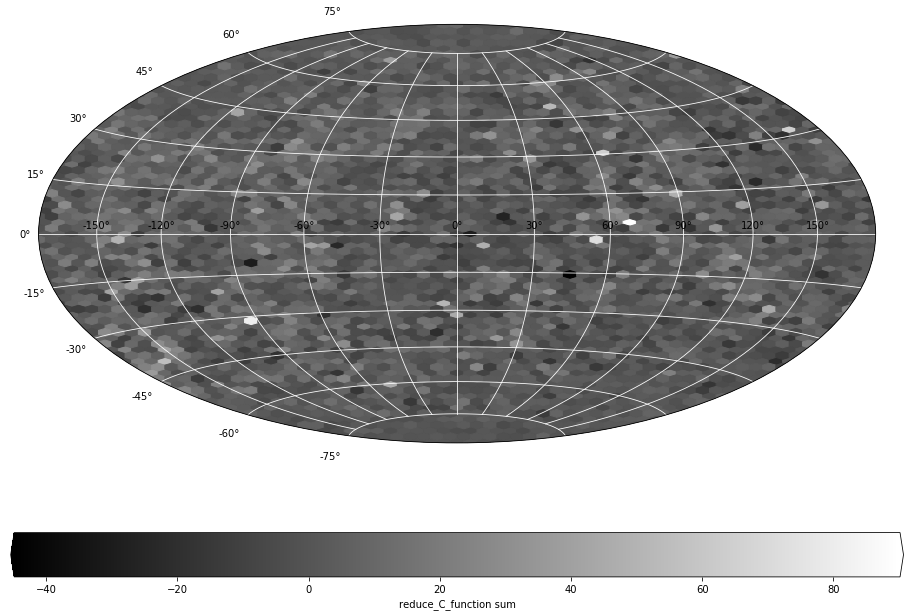

22:08:48.533490:: Begin plot_hex_hammer paralax l, b, 70.
22:08:48.850416:: End plot_hammer paralax.


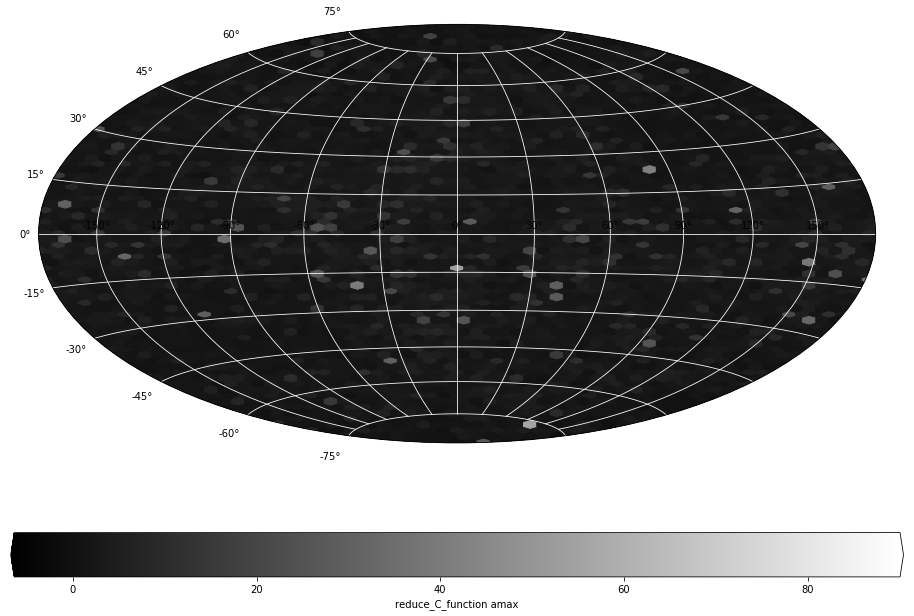

22:08:51.469687:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:08:51.807721:: End plot_hammer paralax.


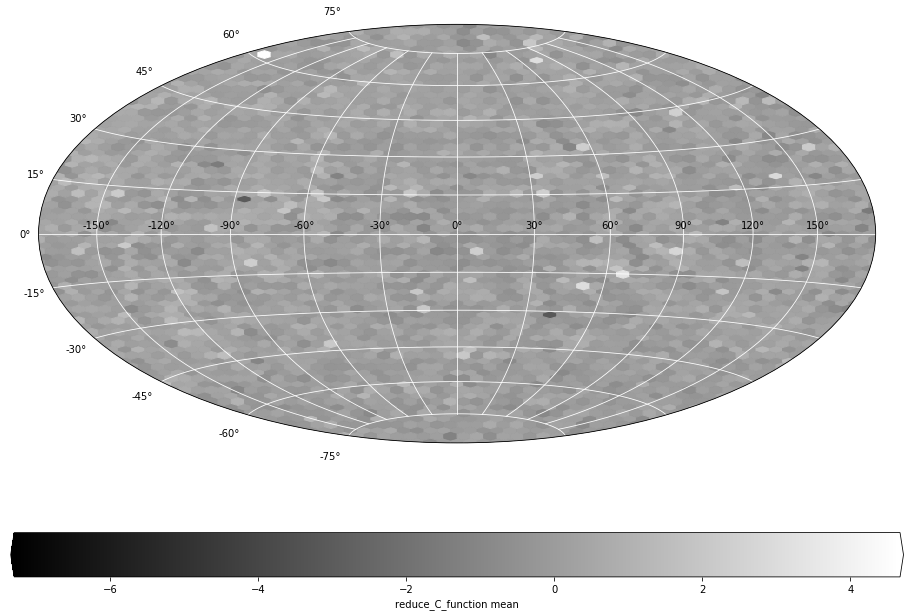

CPU times: user 9.6 s, sys: 1.63 s, total: 11.2 s
Wall time: 9.29 s


In [15]:
%%time

def hexbinmy(df0,x,y,c,gridsize=50,fun_red=np.average):
    import matplotlib as mpl
    plt.figure(figsize=(16,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('k')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.hexbin(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        C = df0[c],
        gridsize=gridsize,
        cmap='gray',#'bwr',#'seismic', #'inferno',
        mincnt=0,
        reduce_C_function=fun_red,
        
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker='o',
        #color = 'r',
        #linewidths=0.01,
        #label = '20-40 ra'
    )
    

    cmap = mpl.cm.cool
    cb = plt.colorbar(h, ax=ax,cmap=cmap,               
                      #norm=norm,
                      #boundaries=bounds,
                      extend='both',
                      extendfrac='auto',
                      #ticks=bounds,
                      spacing='uniform',
                      orientation='horizontal',
                     )
    cb.set_label('reduce_C_function '+str(fun_red.__code__).split()[2])
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.tight_layout()
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='w')#, linestyle='--', linewidth=1.9)
    plt.show()

hexbinmy(df_tgas_hip,'ra','dec','parallax_difference',70,np.sum)    
hexbinmy(df_tgas_hip,'l','b','parallax_difference',70,np.max)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference',70,np.mean)

22:08:54.630952:: Begin plot_hex_hammer paralax ra, dec, 70.
22:08:55.002494:: End plot_hammer paralax.


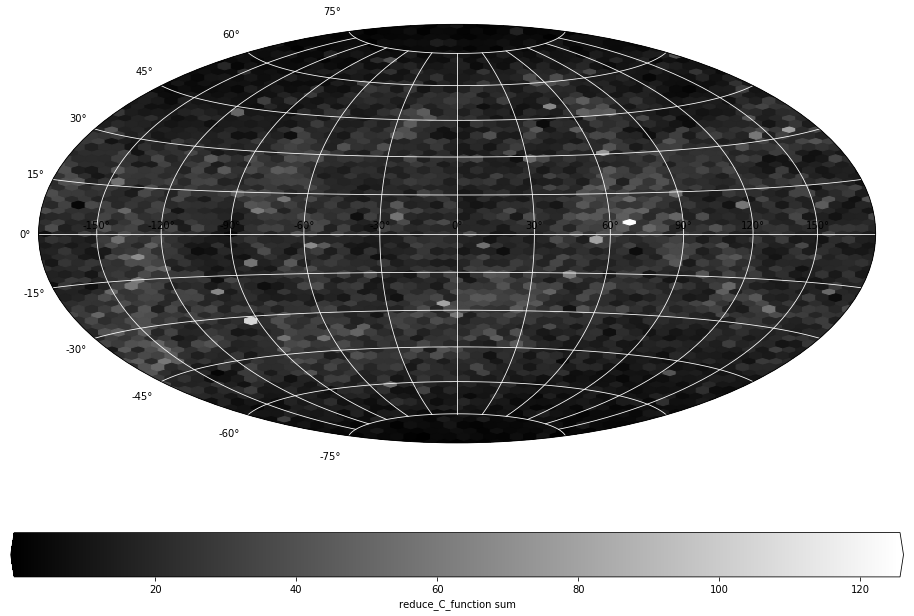

22:08:58.269525:: Begin plot_hex_hammer paralax l, b, 70.
22:08:58.764452:: End plot_hammer paralax.


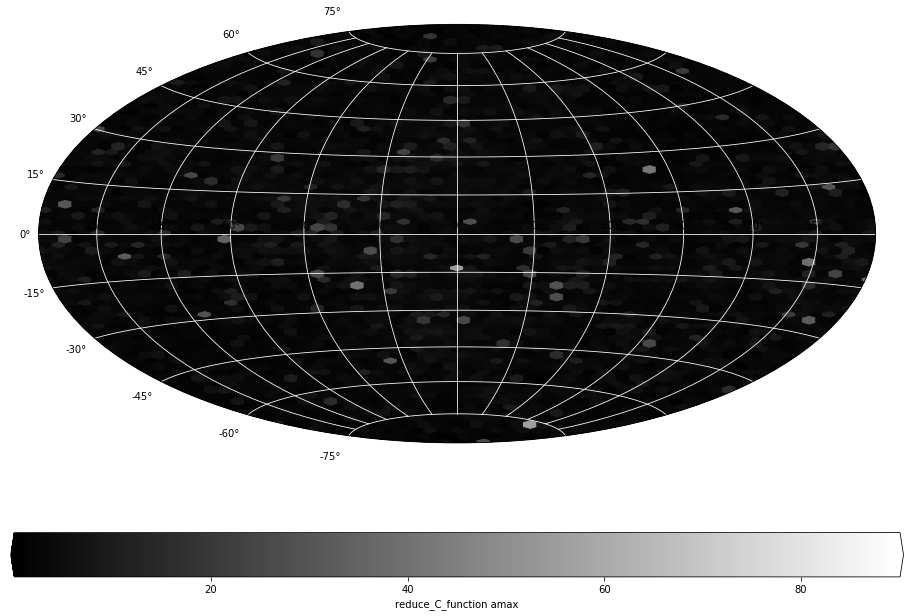

22:09:02.006681:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:09:02.386835:: End plot_hammer paralax.


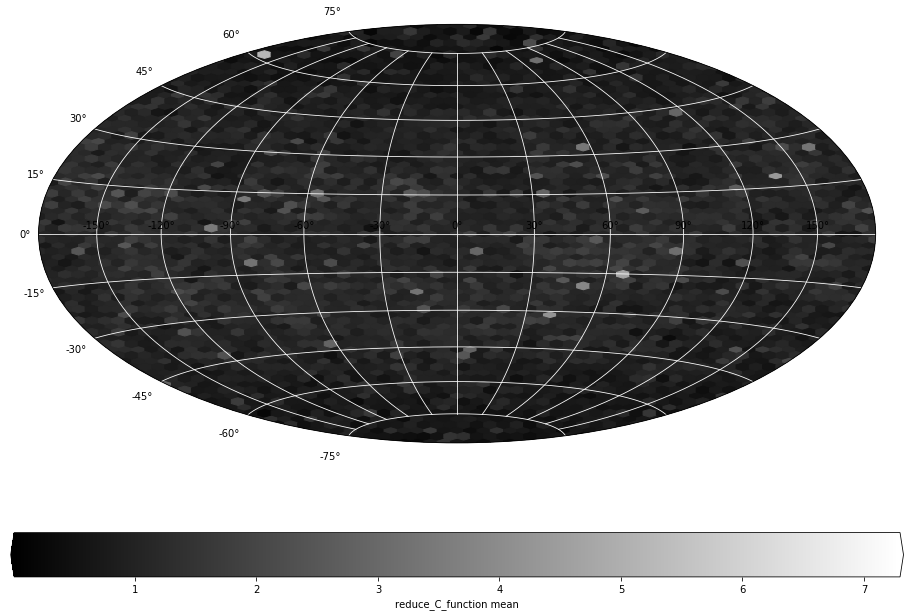

In [16]:

hexbinmy(df_tgas_hip,'ra','dec','parallax_difference_abs',70,np.sum)    
hexbinmy(df_tgas_hip,'l','b','parallax_difference_abs',70,np.max)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70,np.mean)

22:09:05.703324:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:09:06.051831:: End plot_hammer paralax.


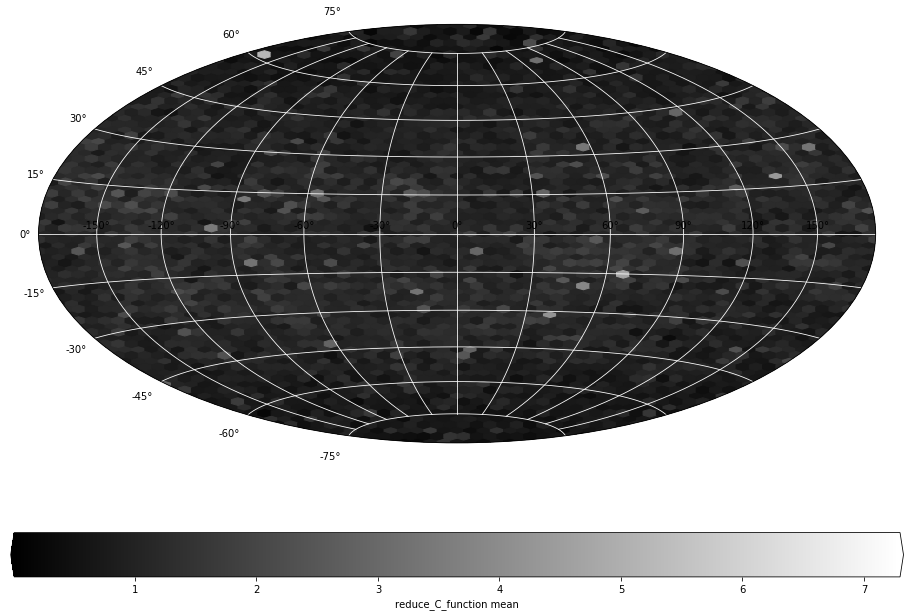

22:09:08.706174:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:09:09.142854:: End plot_hammer paralax.


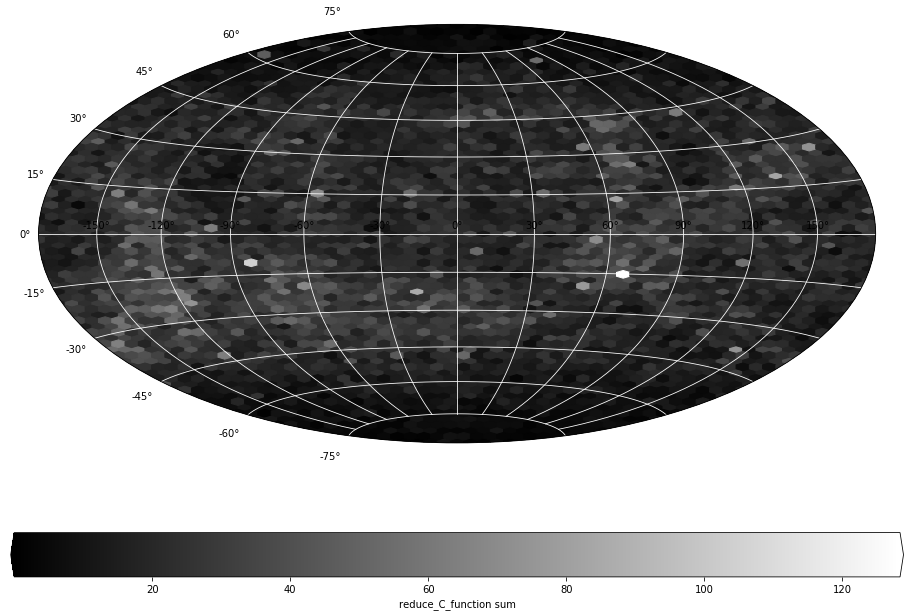

22:09:11.998577:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:09:12.347775:: End plot_hammer paralax.


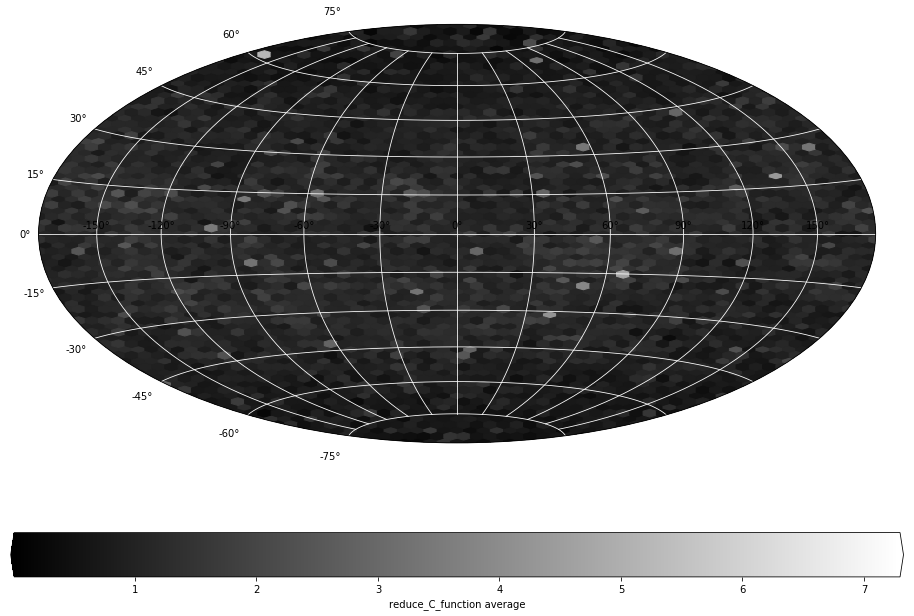

22:09:14.894016:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:09:15.193445:: End plot_hammer paralax.


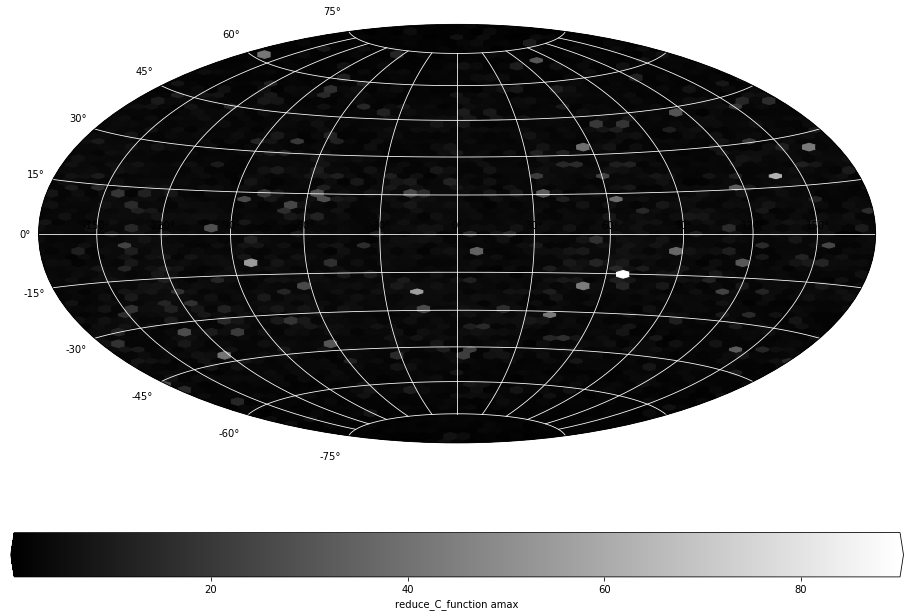

22:09:17.821868:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
22:09:18.126530:: End plot_hammer paralax.


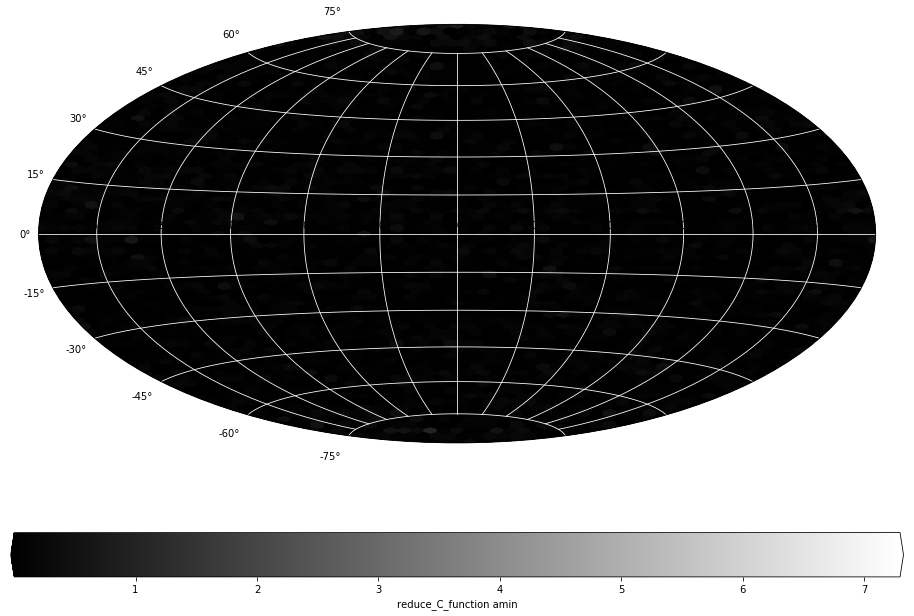

In [17]:
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70,np.mean)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70,np.sum)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70)

hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70,np.max)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70,np.min)

In [18]:
tmp = df_tgas_hip[['l','b','parallax_difference']].sort_values(by='parallax_difference', ascending=False).head(50)
df_tgas_hip[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs']].sort_values(
    by='parallax_difference_abs', ascending=False).head(75)

,hip,parallax,parallax_hip,parallax_difference,parallax_difference_abs
20946,21000,3.613519,93.67,90.056481,90.056481
42393,42525,5.939341,68.54,62.600659,62.600659
116689,117081,7.767833,63.56,55.792167,55.792167
91751,92059,1.025301,55.49,54.464699,54.464699
16539,16582,3.352539,46.79,43.437461,43.437461
49814,49971,10.032883,53.21,43.177117,43.177117
14066,14101,148.510255,106.16,-42.350255,42.350255
90068,90368,9.239326,51.00,41.760674,41.760674
87493,87784,0.901640,41.30,40.398360,40.398360
11139,11167,1.600522,40.32,38.719478,38.719478


22:09:21.045909:: Begin plot_hex_hammer paralax l, b, 70.
22:09:21.049905:: End plot_hammer paralax.


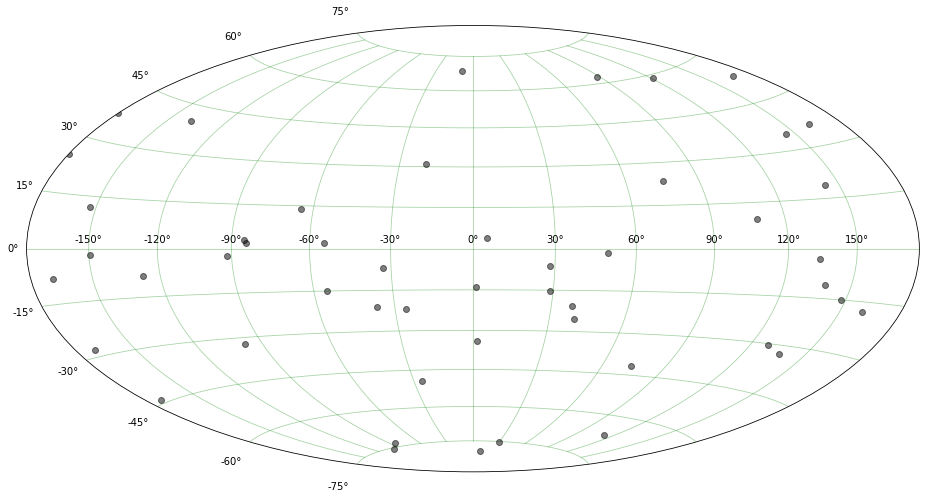

CPU times: user 604 ms, sys: 296 ms, total: 900 ms
Wall time: 540 ms


In [19]:
%%time

def scattermy(df0,x,y,c,gridsize=50,fun_red=np.average):
    import matplotlib as mpl
    plt.figure(figsize=(16,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('w')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.plot(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180, 'ko', alpha=.5
        #s = 1,
        #c = df0[c],
        #gridsize=gridsize,
        #cmap='seismic',#'gray',#'bwr',#'seismic', #'inferno',
        #mincnt=0,
        #reduce_C_function=fun_red,
        
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker="o",
        #color = 1/(df0.max - df0.min) *(df0[c] - df0.min),
        #linewidths=2.01,
        #label = '20-40 ra'
    )
    

    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='g',alpha = .35)#, linestyle='--', linewidth=1.9)
    plt.show()

#scattermy(tmp,'ra','dec','parallax_difference',70,np.sum)    
scattermy(tmp,'l','b','parallax_difference_abs',70,np.max)
#scattermy(tmp,'ecl_lon', 'ecl_lat','parallax_difference',70,np.mean)
  

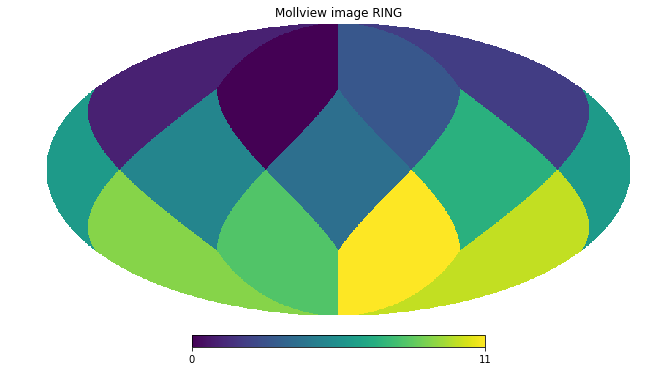

In [20]:
import numpy as np
import healpy as hp
NSIDE = 1
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image RING")

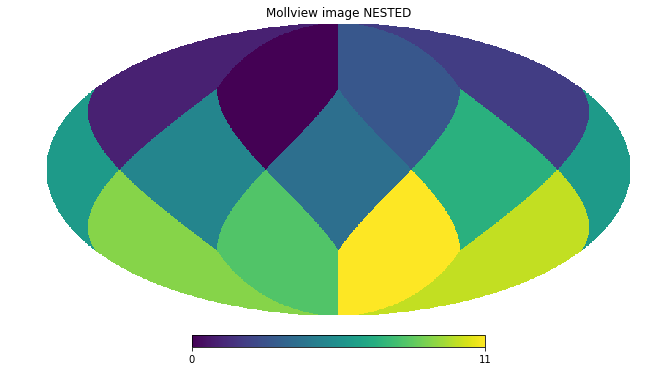

In [21]:
hp.mollview(m, nest=True, title="Mollview image NESTED")

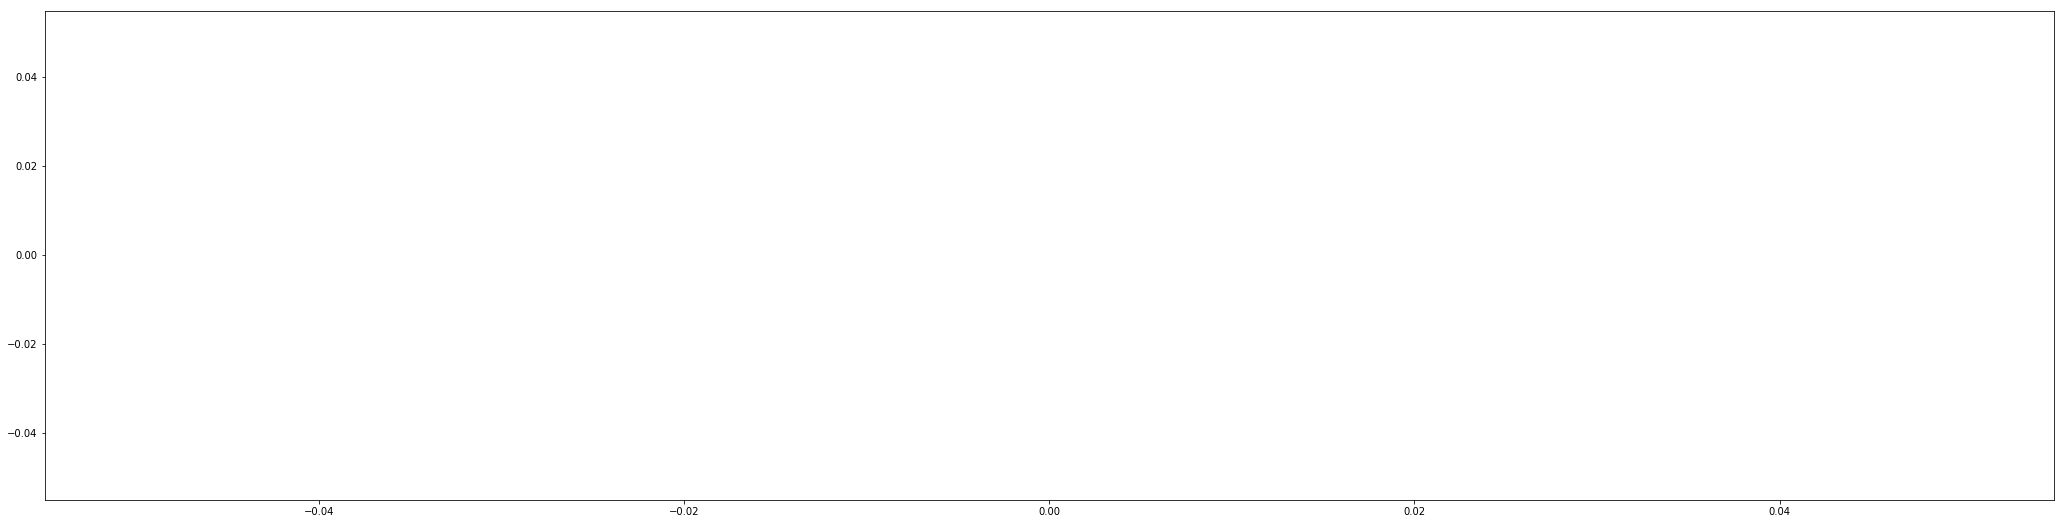

In [22]:
plt.figure(figsize=(36,9))
plt.plot([i for i in np.arange(len(hp.sphtfunc.anafast(m)[25:]))],hp.sphtfunc.anafast(m)[25:]);


In [23]:
hp.get_interp_val(np.arange(12.), 4*np.pi/2,0)

1.5

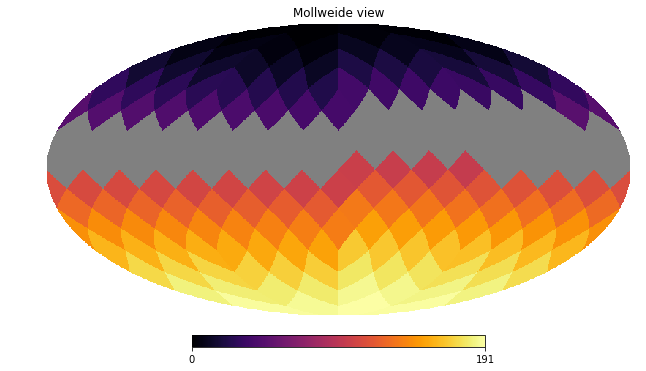

In [24]:
import healpy as hp
from pylab import cm

# Some map with masked pixels
npix = hp.nside2npix(4)
m = np.arange(npix, dtype=float)
m[50:100] = hp.UNSEEN

# adjusting the colour map
cmap = cm.inferno
cmap.set_under('w')
cmap.set_bad('grey')

hp.mollview(m, cmap=cmap)

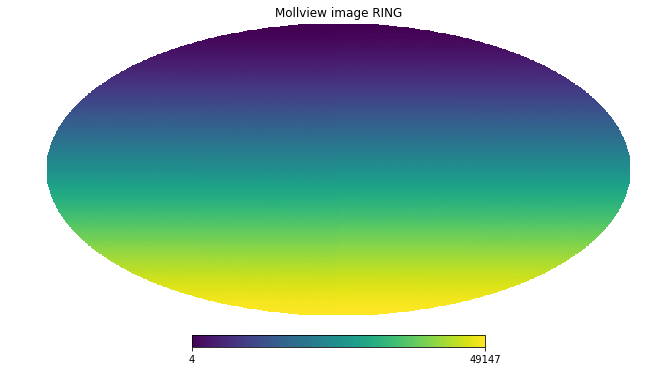

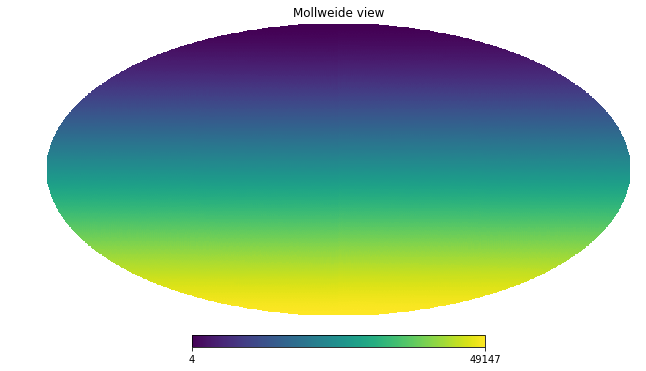

In [25]:
import numpy as np
import healpy as hp
NSIDE = 64
m = np.arange(hp.nside2npix(NSIDE))
hp.mollview(m, title="Mollview image RING")
hp.visufunc.mollview(m)

In [31]:
str(np.sum.__code__).split()[2]

'sum'

In [32]:
np.linalg.lstsq?

In [33]:
x = np.array([0.1, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

In [34]:
A = np.vstack([x]).T
A

array([[ 0.1],
       [ 1. ],
       [ 2. ],
       [ 3. ]])

In [35]:
m = np.linalg.lstsq(A, y)[0]

In [36]:
print(m)

[ 0.58529622]


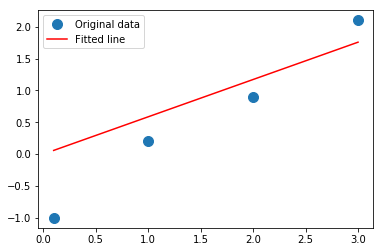

In [37]:
import matplotlib.pyplot as plt
>>> plt.plot(x, y, 'o', label='Original data', markersize=10)
>>> plt.plot(x, m*x, 'r', label='Fitted line')
>>> plt.legend()
>>> plt.show()

In [38]:
1200/12


100.0

In [39]:
128 ** (1/2)

11.313708498984761

In [40]:
12*16**2

3072

In [5]:
import numpy as np
import healpy as hp

import sys
# Enable inline plotting
%matplotlib inline


print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('healpy version ' + hp.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
healpy version 1.11.0


In [61]:

NSIDE = 1

m = np.arange(hp.nside2npix(NSIDE))
#hp.mollview(m, title="Mollview image RING", )
#hp.gnomview(m, title="gnomview image RING", )
#hp.cartview(m, title="cartview image RING", )
#hp.orthview(m, title="orthview image RING", )
#for teta in np.arange(0,np.pi,0.25):
#    for fi in np.arange(0,2*np.pi,0.5):
#        print(teta,fi,hp.ang2pix(NSIDE,teta,fi))

hp.ang2pix(NSIDE,np.pi,np.pi)

10